In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import joblib

In [5]:
df = pd.read_csv('TSLA.csv')
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [22]:
df.dropna(inplace=True)

In [27]:
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'

In [28]:
X = df[features]
y = df[target]

In [29]:
X

,Open,High,Low,Volume
0,3.800000,5.000000,3.508000,93831500
1,5.158000,6.084000,4.660000,85935500
2,5.000000,5.184000,4.054000,41094000
3,4.600000,4.620000,3.742000,25699000
4,4.000000,4.000000,3.166000,34334500
...,...,...,...,...
2951,874.489990,907.849976,867.390015,33408500
2952,914.979980,942.849976,907.090027,27327200
2953,930.000000,997.859985,921.750000,35289500
2954,979.940002,1040.699951,976.400024,40225400


In [30]:
y

0          4.778000
1          4.766000
2          4.392000
3          3.840000
4          3.222000
           ...     
2951     905.390015
2952     921.159973
2953     993.979980
2954     999.109985
2955    1013.919983
Name: Close, Length: 2956, dtype: float64

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [33]:
y_pred = model.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))

R2 Score: 0.999545249841559


In [34]:
joblib.dump(model, "stock_price_model.pkl")

['stock_price_model.pkl']

  Feature  Importance
0    Open    0.181283
1    High    0.460000
2     Low    0.358655
3  Volume    0.000062


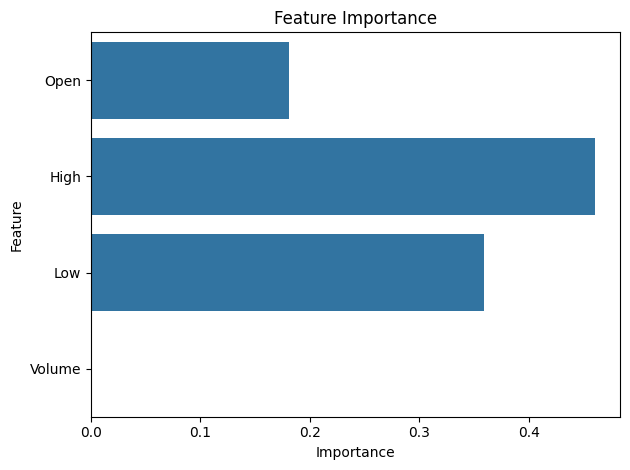

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns


importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
print(feature_importance_df)


sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance")
plt.tight_layout()
plt.savefig("feature_importance.png")
plt.show()


In [36]:
print("Sample Predictions:")
print(X_test.iloc[:5])
print("Predicted:", model.predict(X_test.iloc[:5]))
print("Actual:", y_test.iloc[:5].values)


Sample Predictions:
           Open       High        Low    Volume
1956  60.200001  61.855999  59.099998  67601500
2309  45.830002  46.487999  44.841999  46603000
930   47.299999  48.919998  46.486000  44050500
1213  44.099998  44.160000  43.602001  12139000
2090  53.139999  55.476002  52.448002  47632000
Predicted: [60.62620006 45.2340201  47.78233972 43.82335979 54.05830003]
Actual: [59.860001 45.122002 46.882    43.686001 55.318001]
